In [35]:
# import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path
from collections import Counter
# Import the style from Matplotlib.
from matplotlib import style
import seaborn as sns
import sqlite3
from sqlalchemy import create_engine, text

In [36]:
# Create a DataFrame for the healthcare-dataset-stroke-data.csv. 
file_path = Path("Resources/alzheimers_disease_data.csv")
alzheimer_df = pd.read_csv(file_path)
alzheimer_df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


---
### Data cleaning and preparation process 


In [37]:
# determine the number of rows and columns.
alzheimer_df_rc, alzheimer_df_cc = alzheimer_df.shape
print('Number of total rows:', alzheimer_df_rc)
print('Number of total columns:', alzheimer_df_cc)

Number of total rows: 2149
Number of total columns: 35


In [38]:
# Check all columns inside of the DataFrame
alzheimer_df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
       'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness', 'Diagnosis', 'DoctorInCharge'],
      dtype='object')

In [39]:
# show duplicates
duplicate = alzheimer_df[alzheimer_df.duplicated()]
print("Duplicate Rows:", len(duplicate), "\n")

Duplicate Rows: 0 



In [40]:
# Check for missing values
alzheimer_df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [41]:
# Drop all rows with missing information 
alzheimer_df = alzheimer_df.dropna(how='any')

In [42]:
# print out columns and number of unique values
for col in alzheimer_df.columns:
    print(col, alzheimer_df[col].nunique())

PatientID 2149
Age 31
Gender 2
Ethnicity 4
EducationLevel 4
BMI 2149
Smoking 2
AlcoholConsumption 2149
PhysicalActivity 2149
DietQuality 2149
SleepQuality 2149
FamilyHistoryAlzheimers 2
CardiovascularDisease 2
Diabetes 2
Depression 2
HeadInjury 2
Hypertension 2
SystolicBP 90
DiastolicBP 60
CholesterolTotal 2149
CholesterolLDL 2149
CholesterolHDL 2149
CholesterolTriglycerides 2149
MMSE 2149
FunctionalAssessment 2149
MemoryComplaints 2
BehavioralProblems 2
ADL 2149
Confusion 2
Disorientation 2
PersonalityChanges 2
DifficultyCompletingTasks 2
Forgetfulness 2
Diagnosis 2
DoctorInCharge 1


---
### Exploratory Data Analysis (EDA)



In [43]:
# Look at the stroke outcome value counts
alzheimer_counts = alzheimer_df['Diagnosis'].value_counts()
alzheimer_counts

Diagnosis
0    1389
1     760
Name: count, dtype: int64

In [44]:
# keep only columns of "Ethinicity", "Gender", , "Age", and "EducationLevel"
alzheimer_clean_df = alzheimer_df[['Ethnicity', 'Gender', 'Age', 'EducationLevel', 'Diagnosis']]
alzheimer_clean_df

,Ethnicity,Gender,Age,EducationLevel,Diagnosis
0,0,0,73,2,0
1,0,0,89,0,0
2,3,0,73,1,0
3,0,1,74,1,0
4,0,0,89,0,0
...,...,...,...,...,...
2144,0,0,61,1,1
2145,0,0,75,2,1
2146,0,0,77,1,1
2147,3,1,78,1,1


In [45]:
# Split into Alzheimer's (AD) and Control groups based on Diagnosis column values for machine learning
alzheimer_clean_df_ad = alzheimer_clean_df[alzheimer_clean_df['Diagnosis']==1]
alzheimer_clean_df_ad.head()

,Ethnicity,Gender,Age,EducationLevel,Diagnosis
7,0,0,75,1,1
13,0,1,78,1,1
15,0,0,69,1,1
16,1,1,63,2,1
17,0,1,65,1,1


In [46]:
alzheimer_clean_df_control = alzheimer_clean_df[alzheimer_clean_df['Diagnosis']==0]
alzheimer_clean_df_control.head()

,Ethnicity,Gender,Age,EducationLevel,Diagnosis
0,0,0,73,2,0
1,0,0,89,0,0
2,3,0,73,1,0
3,0,1,74,1,0
4,0,0,89,0,0


### Data Visualization

In [47]:
# Copy alzheimer_clean_df 
alzheimer_EGAE_df = alzheimer_clean_df.copy()

In [48]:
# Replace the code with following expression:
diagnosis_map = {0: "No", 1: "Yes"}
gender_map = {0: "Male", 1: "Female"}
ethnicity_map = {0: "Caucasian", 1: "African American", 2: "Asian", 3: "Other"}
education_map = {0: "None", 1: "High School", 2:"Bachelor's", 3:"Higher"}

alzheimer_EGAE_df['Diagnosis'] = alzheimer_EGAE_df['Diagnosis'].map(diagnosis_map)
alzheimer_EGAE_df['Gender'] = alzheimer_EGAE_df['Gender'].map(gender_map)
alzheimer_EGAE_df['Ethnicity'] = alzheimer_EGAE_df['Ethnicity'].map(ethnicity_map)
alzheimer_EGAE_df['EducationLevel'] = alzheimer_EGAE_df['EducationLevel'].map(education_map)
alzheimer_EGAE_df

,Ethnicity,Gender,Age,EducationLevel,Diagnosis
0,Caucasian,Male,73,Bachelor's,No
1,Caucasian,Male,89,None,No
2,Other,Male,73,High School,No
3,Caucasian,Female,74,High School,No
4,Caucasian,Male,89,None,No
...,...,...,...,...,...
2144,Caucasian,Male,61,High School,Yes
2145,Caucasian,Male,75,Bachelor's,Yes
2146,Caucasian,Male,77,High School,Yes
2147,Other,Female,78,High School,Yes


In [49]:
# Save the dataframe to a CSV file
alzheimer_EGAE_df.to_csv('Resources/alzheimer_EGAE_df.csv', index=False)

In [50]:
# Create a SQLite database engine
engine = create_engine('sqlite:///alzheimer_EGAE_data.db')

# Write the DataFrame to a SQL table
alzheimer_EGAE_df.to_sql('alzheimer_EGAE_data', engine, index=False, if_exists='replace')

# Generate SQL file
with engine.connect() as conn:
    with open('alzheimer_EGAE_data.sql', 'w') as f:
        result = conn.execute(text("SELECT * FROM alzheimer_EGAE_data"))
        for line in result.fetchall():
            f.write(f"INSERT INTO alzheimer_EGAE_data VALUES {line};\n")

In [51]:
# Split into Alzheimer's (AD) and Control groups based on Diagnosis column values for vasualization
alzheimer_EGAE_df_ad = alzheimer_EGAE_df[alzheimer_EGAE_df['Diagnosis']=='Yes']
alzheimer_EGAE_df_control = alzheimer_EGAE_df[alzheimer_EGAE_df['Diagnosis']=='No']

In [52]:
# Create csv files for each sub-dataframe
alzheimer_EGAE_df_ad.to_csv('alzheimer_ad.csv', index=False)
alzheimer_EGAE_df_control.to_csv('alzheimer_control.csv', index=False)

In [53]:
# Show the resulting dataframes to verify the split
alzheimer_EGAE_df_ad.head()

,Ethnicity,Gender,Age,EducationLevel,Diagnosis
7,Caucasian,Male,75,High School,Yes
13,Caucasian,Female,78,High School,Yes
15,Caucasian,Male,69,High School,Yes
16,African American,Female,63,Bachelor's,Yes
17,Caucasian,Female,65,High School,Yes


Gender: Gender of the patients, where 0 represents Male and 1 represents Female.
Ethnicity: The ethnicity of the patients, coded as follows:
0: Caucasian
1: African American
2: Asian
3: Other
EducationLevel: The education level of the patients, coded as follows:
0: None
1: High School
2: Bachelor's
3: Higher

In [54]:
alzheimer_EGAE_df_control.head()

,Ethnicity,Gender,Age,EducationLevel,Diagnosis
0,Caucasian,Male,73,Bachelor's,No
1,Caucasian,Male,89,None,No
2,Other,Male,73,High School,No
3,Caucasian,Female,74,High School,No
4,Caucasian,Male,89,None,No


### Age counts of alzheimer patients and non-patients

c:\Users\Yi\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yi\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yi\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Yi\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values

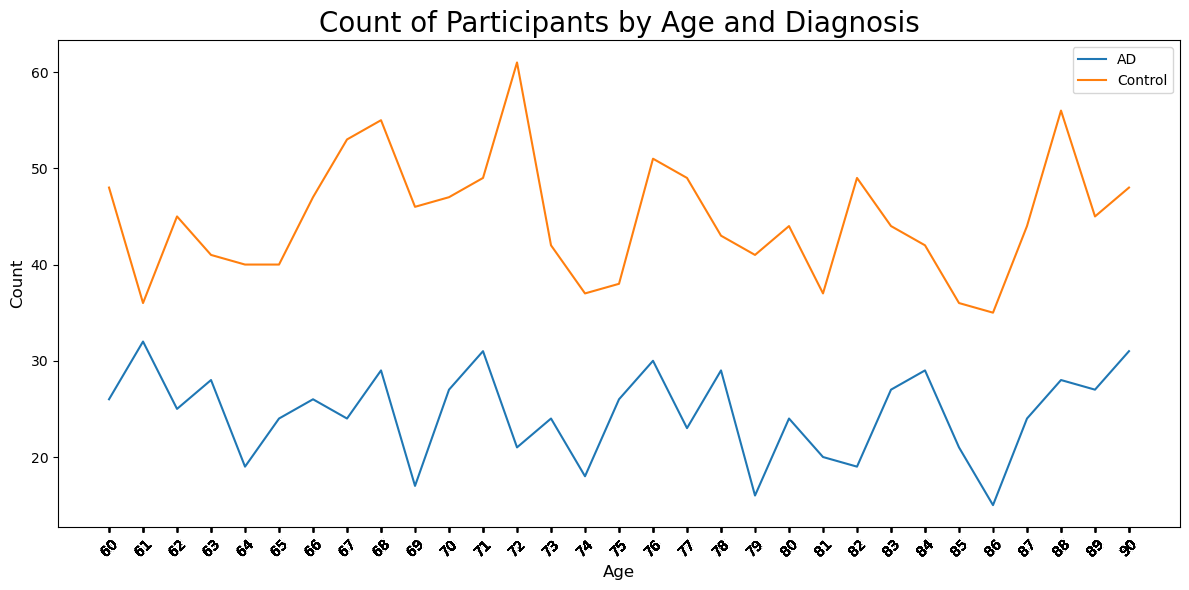

In [92]:
# Count the occurrences of each age for both groups
age_counts_ad = alzheimer_EGAE_df_ad['Age'].value_counts().sort_index()
age_counts_control = alzheimer_EGAE_df_control['Age'].value_counts().sort_index()

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=age_counts_ad.index, y=age_counts_ad.values, label='AD')
sns.lineplot(x=age_counts_control.index, y=age_counts_control.values, label='Control')

# Customize the plot
plt.title('Count of Participants by Age and Diagnosis', fontsize=20)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(alzheimer_EGAE_df_ad['Age'], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Ethnicity distribution of alzheimer patients

In [56]:
# Review value counts of Ethnicity
alzheimer_EGAE_df_ad['Ethnicity'].value_counts()

Ethnicity
Caucasian           463
African American    146
Asian                84
Other                67
Name: count, dtype: int64

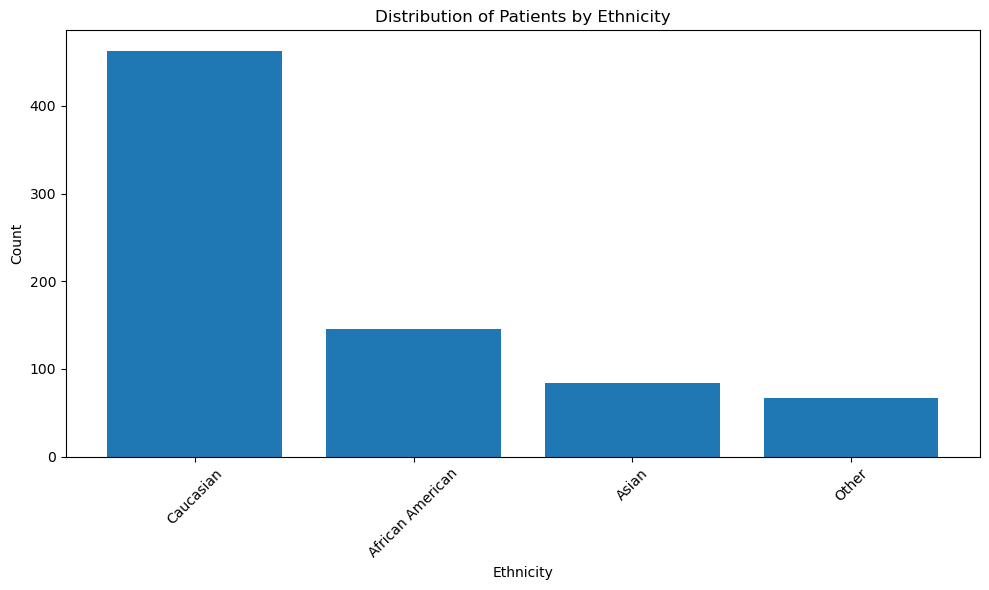

In [57]:
"""
Counts the occurrences of each ethnicity in the `alzheimer_EGAE_df_ad` DataFrame.
"""
# Count the occurrences of each ethnicity
ethnicity_counts_ad = alzheimer_EGAE_df_ad['Ethnicity'].value_counts()

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(ethnicity_counts_ad.index, ethnicity_counts_ad.values)
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.title('Distribution of Patients by Ethnicity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Gender distribution of Alzheimer's patients

In [58]:
# Review value counts of gender
alzheimer_EGAE_df_ad['Gender'].value_counts()

Gender
Male      386
Female    374
Name: count, dtype: int64

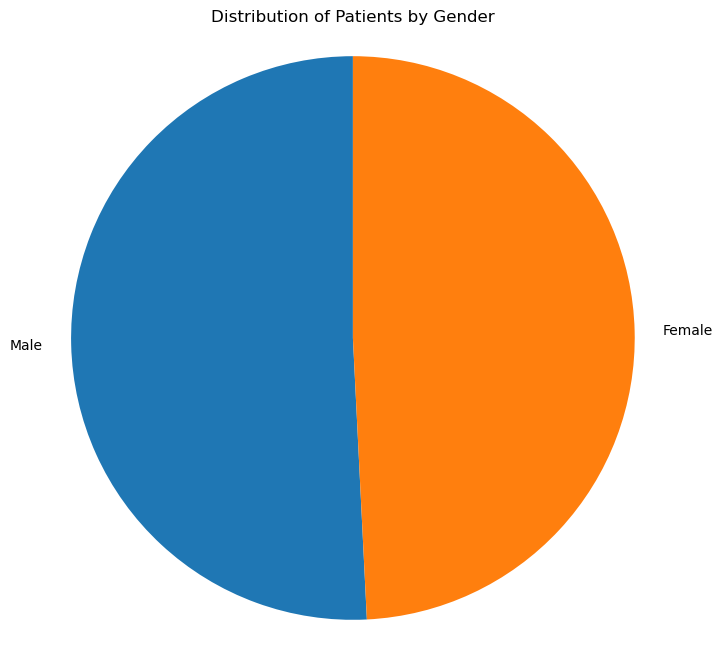

In [59]:
# Count the occurrences of each gender
gender_counts_ad = alzheimer_EGAE_df_ad['Gender'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts_ad.values, labels=gender_counts_ad.index, startangle=90)
plt.title('Distribution of Patients by Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [60]:
# Review value counts for the 'EducationLevel' column
alzheimer_EGAE_df_ad['EducationLevel'].value_counts()

EducationLevel
High School    302
Bachelor's     217
None           174
Higher          67
Name: count, dtype: int64

### Edcation distribution of Alzheimer's patients

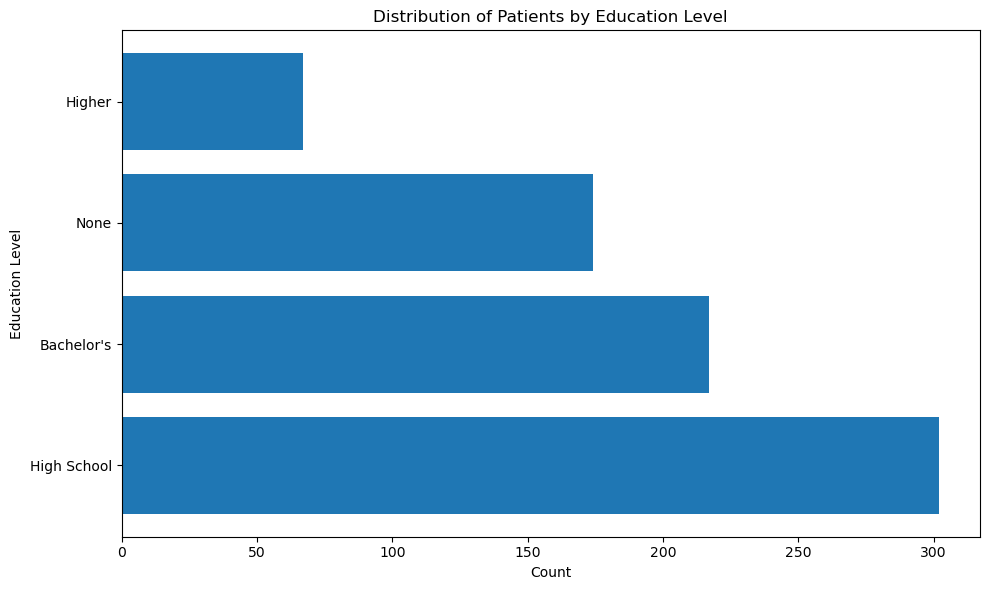

In [61]:
# Count the occurrences of each education level
education_counts_ad = alzheimer_EGAE_df_ad['EducationLevel'].value_counts()

# Create the horizontal bar graph
plt.figure(figsize=(10, 6))
plt.barh(education_counts_ad.index, education_counts_ad.values)
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.title('Distribution of Patients by Education Level')
plt.tight_layout()
plt.show()

### Data Analysis

### Age correlation with Alzheimer's Disease

In [96]:
# Calculate the age counts of participants in the data frame 
age_counts = alzheimer_EGAE_df['Age'].value_counts()

In [97]:
# Normalize the age counts
age_proportions_ad = age_counts_ad / age_counts.sum() * 100
age_proportions_control = age_counts_control / age_counts.sum() * 100
age_proportions = age_counts / age_counts.sum() * 100
age_proportions_ad.head()

Age
60    1.209865
61    1.489065
62    1.163332
63    1.302932
64    0.884132
Name: count, dtype: float64

In [98]:
# Create a DataFrame to compare the proportions:
age_comparison = pd.DataFrame({
    'AD': age_proportions_ad,
    'Control': age_proportions_control,
    'Age Cunts': age_proportions
})

In [99]:
# Calculate the correlation between AD and Control age proportions:
correlation = age_comparison['AD'].corr(age_comparison['Control'])
correlation

0.27524760536085385

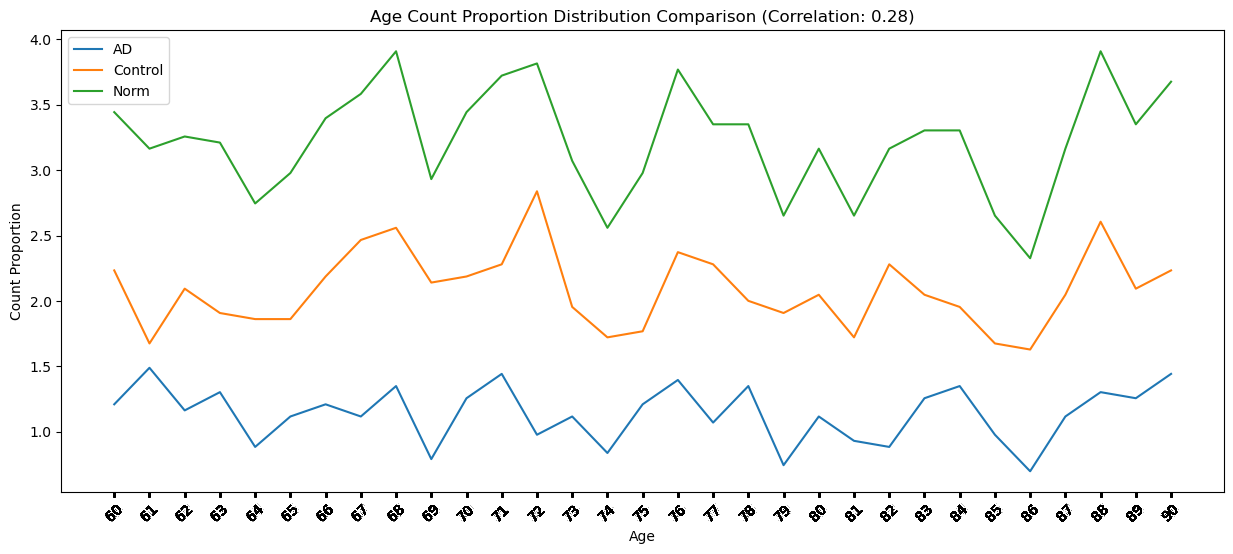

In [100]:
# Visualize the comparison
age_comparison.plot()
plt.title(f'Age Count Proportion Distribution Comparison (Correlation: {correlation:.2f})')
plt.xlabel('Age')
plt.ylabel('Count Proportion')
plt.legend(['AD', 'Control', 'Norm'])
plt.xticks(alzheimer_clean_df['Age'], rotation=45)
plt.gcf().set_size_inches(15, 6)
plt.show()

In [116]:
# Find maximum value of count proportion difference between AD age  and Control age
age_prop_diff = age_proportions_ad - age_proportions_control
age_prop_diff

Age
60   -1.023732
61   -0.186133
62   -0.930665
63   -0.604933
64   -0.977199
65   -0.744532
66   -0.977199
67   -1.349465
68   -1.209865
69   -1.349465
70   -0.930665
71   -0.837599
72   -1.861331
73   -0.837599
74   -0.884132
75   -0.558399
76   -0.977199
77   -1.209865
78   -0.651466
79   -1.163332
80   -0.930665
81   -0.791066
82   -1.395998
83   -0.791066
84   -0.604933
85   -0.697999
86   -0.930665
87   -0.930665
88   -1.302932
89   -0.837599
90   -0.791066
Name: count, dtype: float64

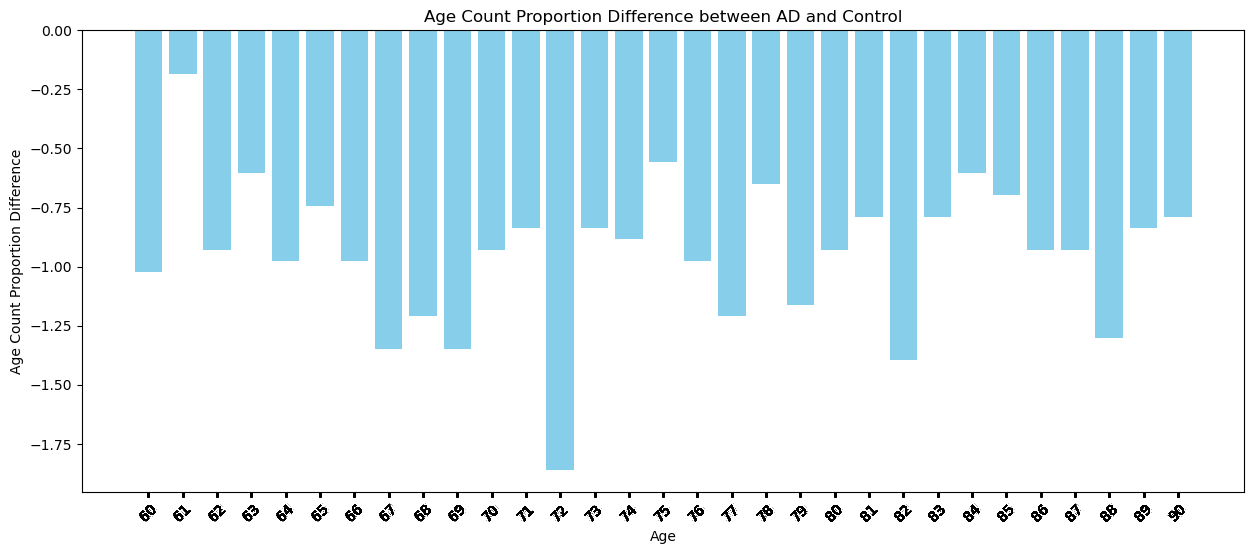

In [117]:
# Visualize the difference 
plt.bar(age_prop_diff.index, age_prop_diff.values, color='skyblue')
plt.title(f'Age Count Proportion Difference between AD and Control')
plt.xlabel('Age')
plt.ylabel('Age Count Proportion Difference')
plt.xticks(alzheimer_clean_df['Age'], rotation=45)
plt.gcf().set_size_inches(15, 6)
plt.show()

In [119]:
print("Participants at age 61 demonstrate the highest proportion of AD patients compared to control group.")

Participants at age 61 demonstrate the highest proportion of AD patients compared to control group.


### Plot a diagonal correlation matrix using seaborn heatmap

C:\Users\Yi\AppData\Local\Temp\ipykernel_14832\4034581570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alzheimer_clean_df['AD'] = (alzheimer_clean_df['Diagnosis'] == 1)


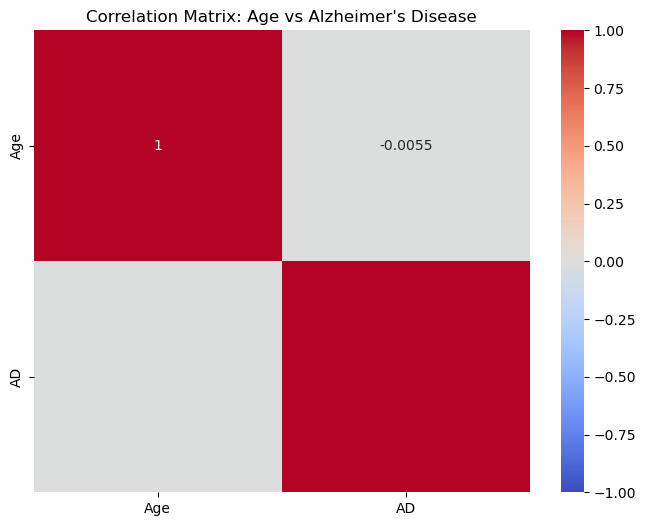

In [67]:

# Create a binary column for Alzheimer's disease (1 for AD, 0 for control)
alzheimer_clean_df['AD'] = (alzheimer_clean_df['Diagnosis'] == 1)

# Select the relevant columns
"""
Extracts the 'Age' and 'AD' columns from the 'alzheimer_clean_df' DataFrame to create a new DataFrame 'correlation_data' for calculating the correlation matrix.
"""
correlation_data = alzheimer_clean_df[['Age', 'AD']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Create the diagonal correlation matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix: Age vs Alzheimer\'s Disease')
plt.show()